# STEP 1

# IMPORTING LIBRARIES

In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt



# STEP 2

# LOADING DATASET

In [30]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# DISPLAYING FIRST 5 ROWS

In [31]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# STEP 3

# DATASET SIZE

In [33]:
df.shape

(7043, 21)

# DATASET SUMMARY

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# DESCRIPTIVE STATISTICS

In [35]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# STEP 4

# EXPLORATORY DATA ANALYSIS(EDA)

# ANALYZE DATA TYPES

In [36]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)


Numerical Columns:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

Categorical Columns:
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


# VISUALIZING CHURN DISTRIBUTION

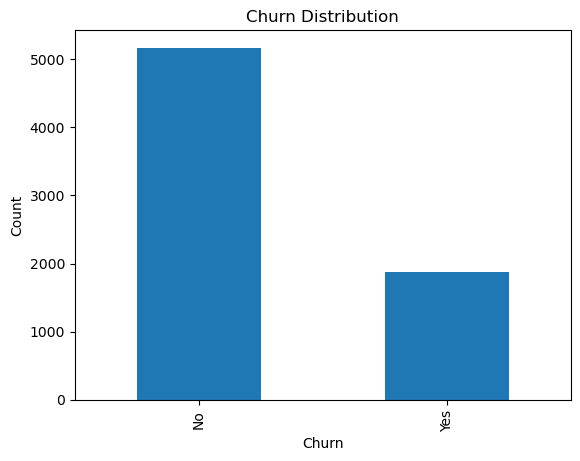

In [38]:
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


# VISUALIZING CHURN VS TENURE

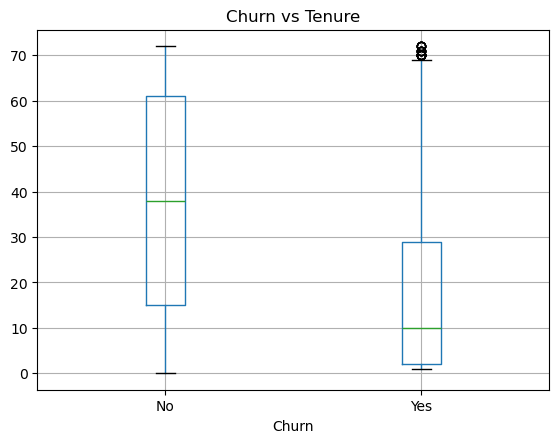

In [39]:
df.boxplot(column='tenure', by='Churn')
plt.title('Churn vs Tenure')
plt.suptitle('')
plt.show()


# VISUALIZING CHURN VS MONTHY CHARGES

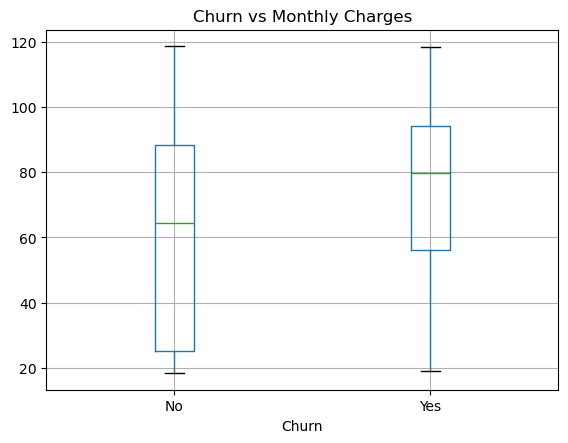

In [40]:
df.boxplot(column='MonthlyCharges', by='Churn')
plt.title('Churn vs Monthly Charges')
plt.suptitle('')
plt.show()


# VISUALIZING CONTRACT TYPE VS CHURN

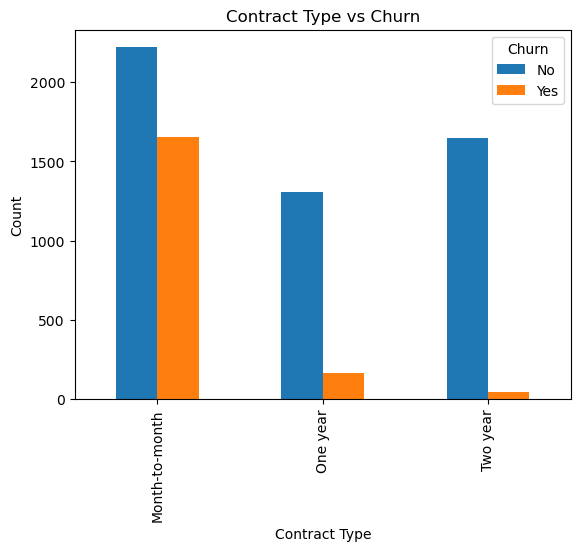

In [41]:
pd.crosstab(df['Contract'], df['Churn']).plot(kind='bar')
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


# STEP 5

# DATA CLEANING

# CHECK MISSING VALUES

In [42]:
# Check missing values
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# HANDLE INCONSISTENT ENTRIES

In [43]:
for col in categorical_cols:
    print(col, ":", df[col].unique())
    print("-" * 40)


customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------
gender : ['Female' 'Male']
----------------------------------------
Partner : ['Yes' 'No']
----------------------------------------
Dependents : ['No' 'Yes']
----------------------------------------
PhoneService : ['No' 'Yes']
----------------------------------------
MultipleLines : ['No phone service' 'No' 'Yes']
----------------------------------------
InternetService : ['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity : ['No' 'Yes' 'No internet service']
----------------------------------------
OnlineBackup : ['Yes' 'No' 'No internet service']
----------------------------------------
DeviceProtection : ['No' 'Yes' 'No internet service']
----------------------------------------
TechSupport : ['No' 'Yes' 'No internet service']
----------------------------------------
StreamingTV : ['No' 'Yes' 'No internet service']


# CLEANING COLUMN NAMED "MultipleLines"

In [44]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')


# CLEANING "INTERNET DEPENDENT" COLUMNS

Columns:

OnlineSecurity

OnlineBackup

DeviceProtection

TechSupport

StreamingTV

StreamingMovies

In [45]:
internet_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in internet_cols:
    df[col] = df[col].replace('No internet service', 'No')


# CHANGE "TotalCharges" COLUMN DATATYPE FROM STRING TO NUMERIC

In [46]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [47]:
df['TotalCharges'].isnull().sum()


np.int64(11)

In [50]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


# REMOVE COLUMN NAMED "customerID"

In [51]:
df.drop('customerID', axis=1, inplace=True)


# REMOVIG DUPLICATE ROWS

In [56]:
df = df.drop_duplicates()

# FINAL VALIDATION

In [57]:
print(df.isnull().sum())
print(df.duplicated().sum())


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
0


# STEP 6

# FEATURE ENGINEERING

# AVERAGE CHARGES PER MONTH

In [58]:
# Avoid division by zero
df['AvgChargesPerMonth'] = df['TotalCharges'] / (df['tenure'] + 1)


# TENURE GROUP (CUSTOMER LIFECYCLE)

In [59]:
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 year'
    elif tenure <= 24:
        return '1-2 years'
    elif tenure <= 48:
        return '2-4 years'
    else:
        return '4+ years'

df['TenureGroup'] = df['tenure'].apply(tenure_group)


# IS LONG-TERM CONTRACT(BINARY FEATURE)

In [60]:
df['IsLongTermContract'] = df['Contract'].apply(
    lambda x: 1 if x in ['One year', 'Two year'] else 0
)


# COUNT OF SUBSCRIBED SERVICES

In [61]:
service_features = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

df['NumServicesSubscribed'] = df[service_features].apply(
    lambda row: sum(row == 'Yes'), axis=1
)


# HIGH MONTHLY CHARGES FLAG

In [62]:
high_charge_threshold = df['MonthlyCharges'].quantile(0.75)

df['HighMonthlyCharge'] = (df['MonthlyCharges'] > high_charge_threshold).astype(int)


# SENIOR CITIZEN FLAG (ENSURE BINARY)

In [63]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)


# FINAL VALIDATION

In [64]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7021 non-null   object 
 1   SeniorCitizen          7021 non-null   int32  
 2   Partner                7021 non-null   object 
 3   Dependents             7021 non-null   object 
 4   tenure                 7021 non-null   int64  
 5   PhoneService           7021 non-null   object 
 6   MultipleLines          7021 non-null   object 
 7   InternetService        7021 non-null   object 
 8   OnlineSecurity         7021 non-null   object 
 9   OnlineBackup           7021 non-null   object 
 10  DeviceProtection       7021 non-null   object 
 11  TechSupport            7021 non-null   object 
 12  StreamingTV            7021 non-null   object 
 13  StreamingMovies        7021 non-null   object 
 14  Contract               7021 non-null   object 
 15  Paperless

# STEP 7

# DATA TRANSFORMATION (FEATURE ENCODING & SCALING)

# FEATURE ENCODING

# SEPARATE FEATURES AND TARGET

X = df.drop('Churn', axis=1)
y = df['Churn'].map({'No': 0, 'Yes': 1})


# IDENTIFY CATEGORICAL & NUMERICAL COLUMNS

In [66]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TenureGroup'],
      dtype='object')
Numerical Columns: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'AvgChargesPerMonth', 'IsLongTermContract', 'NumServicesSubscribed',
       'HighMonthlyCharge'],
      dtype='object')


# ONE-HOT ENCODING

In [68]:
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)


# FEATURE SCALING

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(
    X_encoded[numerical_cols]
)


# FINAL VALIDATION

In [70]:
X_encoded.shape


(7021, 30)

# STEP 8

# DATA SPLITTING

# SPLIT THE DATA(80% TRAIN, 20% TEST)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,          # features
    y,                  # target
    test_size=0.2,      # 20% test data
    random_state=42,    # reproducibility
    stratify=y          # IMPORTANT for churn data
)


# VERIFY SPLIT SIZES

In [73]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

print("\nChurn distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nChurn distribution in test set:")
print(y_test.value_counts(normalize=True))


Training set shape: (5616, 30)
Testing set shape: (1405, 30)

Churn distribution in training set:
Churn
0    0.735577
1    0.264423
Name: proportion, dtype: float64

Churn distribution in test set:
Churn
0    0.735231
1    0.264769
Name: proportion, dtype: float64


# STEP 9

# MODEL SELECTION AND TRAINING

# RANDOM FOREST MODEL TRAINING

In [74]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=200,        # Number of trees
    random_state=42,         # Reproducibility
    class_weight='balanced'  # Handle churn imbalance
)

# Train the model
rf_model.fit(X_train, y_train)

# Training accuracy (optional check)
print("Random Forest training accuracy:", rf_model.score(X_train, y_train))


Random Forest training accuracy: 0.9976851851851852


# STEP 10

# MODEL EVALUATION

# PREDICTION ON THE TEST SET

In [86]:
# Predictions
y_pred_best = rf_best.predict(X_test)

# Predicted probabilities (for ROC curve)
y_prob_best = rf_best.predict_proba(X_test)[:,1]


# CALCULATE METRICS

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

acc = accuracy_score(y_test, y_pred_best)
prec = precision_score(y_test, y_pred_best)
rec = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
roc_auc = roc_auc_score(y_test, y_prob_best)

print("Tuned Random Forest Metrics:")
print("Accuracy :", round(acc, 4))
print("Precision:", round(prec, 4))
print("Recall   :", round(rec, 4))
print("F1-score :", round(f1, 4))
print("ROC-AUC  :", round(roc_auc, 4))


Tuned Random Forest Metrics:
Accuracy : 0.7765
Precision: 0.5582
Recall   : 0.7473
F1-score : 0.6391
ROC-AUC  : 0.8418


# CONFUSION MATRIX

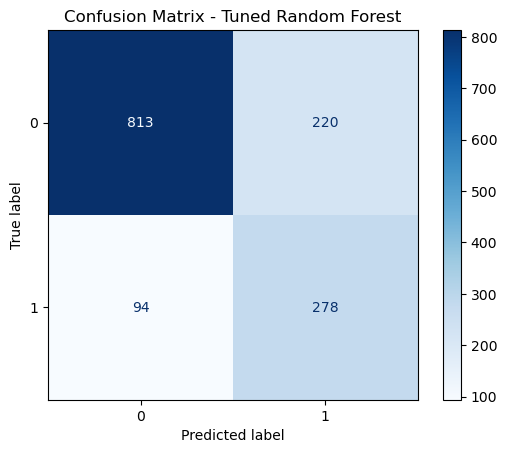

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_best)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()


# ROC CURVE

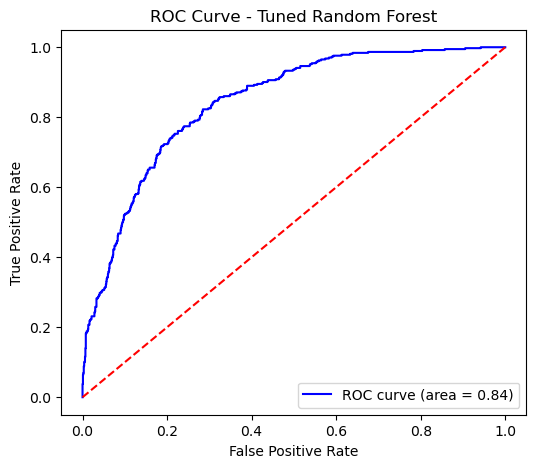

In [89]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Random Forest")
plt.legend(loc="lower right")
plt.show()


# STEP 11

# HYPERPARAMETER TUNING

# DEFINE THE PARAMETER GRID

In [92]:
param_grid = {
    'n_estimators': [100, 200, 300],        # number of trees
    'max_depth': [None, 10, 20, 30],       # depth of trees
    'min_samples_split': [2, 5, 10],       # min samples to split a node
    'min_samples_leaf': [1, 2, 4],         # min samples at leaf node
    'class_weight': ['balanced']           # handle churn imbalance
}


# INITIALIZE GridSearchCV

In [93]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,                   # 3-fold cross-validation
    scoring='recall',       # prioritize recall for churn
    n_jobs=-1,              # use all cores for speed
    verbose=1               # show progress
)


# FIT THE GRID SEARCH ON TRAINING DATA

In [94]:
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'class_weight': ['balanced'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


# VIEW THE BEST PARAMETERS

In [97]:
print("Best parameters found:", grid_search.best_params_)


Best parameters found: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


# TRAIN THE FINE TUNED MODEL

In [98]:
rf_best = grid_search.best_estimator_

check training accuracy
print("Tuned Random Forest training accuracy:", rf_best.score(X_train, y_train))


Tuned Random Forest training accuracy: 0.8256766381766382


# STEP 12

# VISUALIZATION

# FEATURE IMPORTANCE

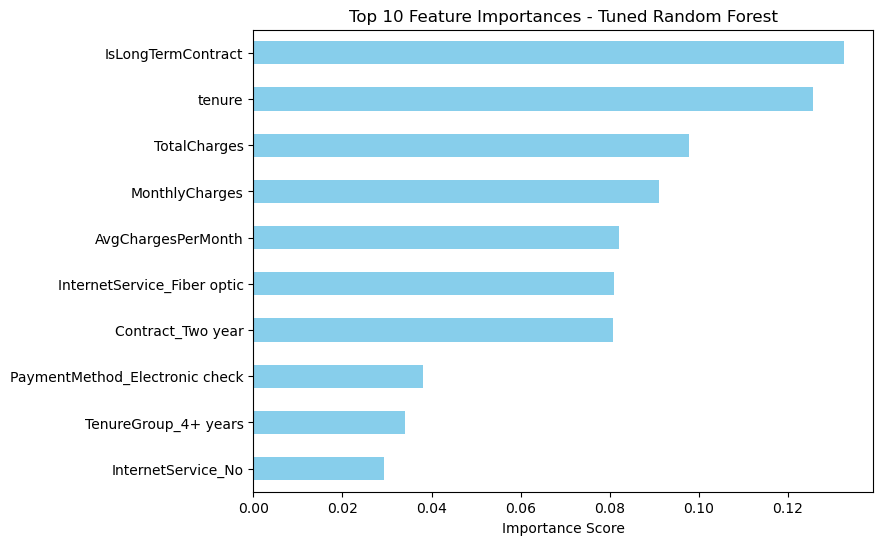

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
feature_importances = pd.Series(rf_best.feature_importances_, index=X_encoded.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Top 10 features
top_features = feature_importances.head(10)

# Plot
plt.figure(figsize=(8,6))
top_features.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()  # largest at top
plt.title("Top 10 Feature Importances - Tuned Random Forest")
plt.xlabel("Importance Score")
plt.show()


# PARTIAL DEPENDENCE PLOTS

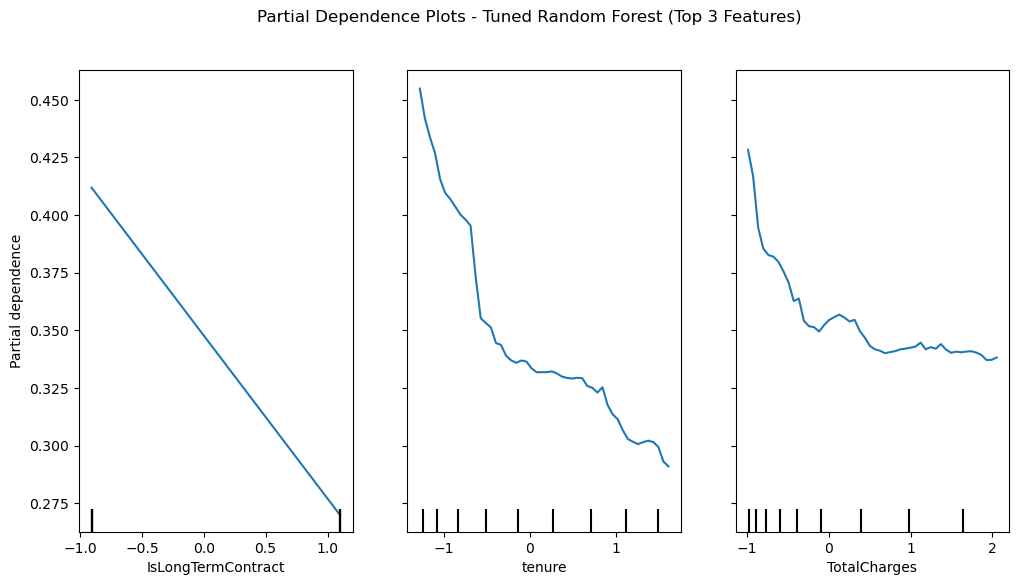

In [105]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Select top 3 features
top_3_features = top_features.index[:3]

# Plot partial dependence
fig, ax = plt.subplots(figsize=(12,6))
PartialDependenceDisplay.from_estimator(
    rf_best,
    X_train,
    features=top_3_features,
    grid_resolution=50,
    ax=ax
)
plt.suptitle("Partial Dependence Plots - Tuned Random Forest (Top 3 Features)")
plt.show()


# CLASS BALANCE VISUALIZATION

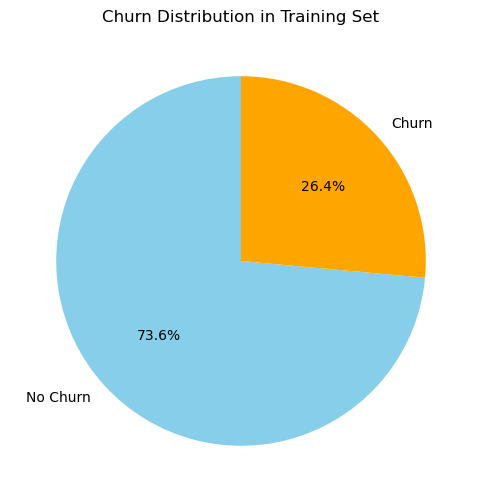

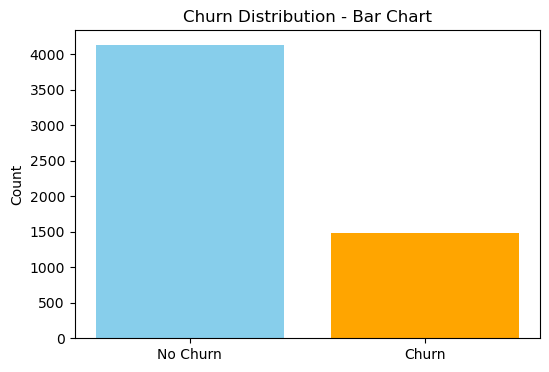

In [106]:
#CHURN DISTRIBUTION
import matplotlib.pyplot as plt

# Count of churn classes
churn_counts = y_train.value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', colors=['skyblue','orange'], startangle=90)
plt.title("Churn Distribution in Training Set")
plt.show()

# Optional: bar chart
plt.figure(figsize=(6,4))
plt.bar(['No Churn','Churn'], churn_counts, color=['skyblue','orange'])
plt.ylabel("Count")
plt.title("Churn Distribution - Bar Chart")
plt.show()


# CORRELATION HEATMAP

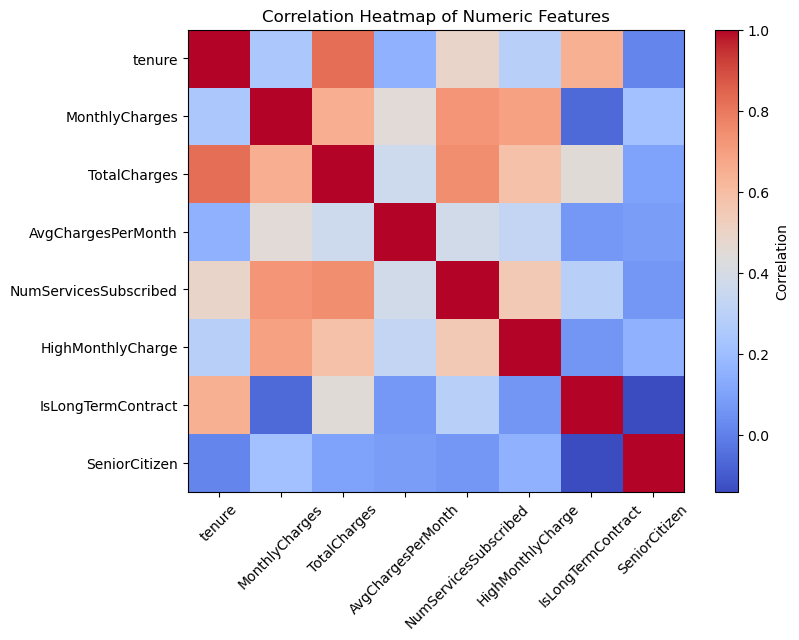

In [108]:


# Select numeric features
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgChargesPerMonth', 'NumServicesSubscribed', 'HighMonthlyCharge', 'IsLongTermContract', 'SeniorCitizen']

corr_matrix = X_encoded[numeric_cols].corr()

# Plot heatmap using matplotlib only
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# PREDICTED PROBABILITY HISTOGRAM

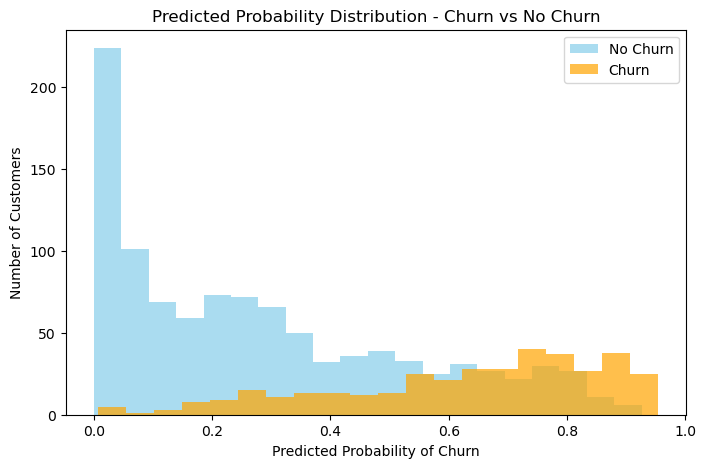

In [109]:
# Predicted probabilities for class 1 (Churn)
y_prob = rf_best.predict_proba(X_test)[:,1]

plt.figure(figsize=(8,5))
plt.hist(y_prob[y_test==0], bins=20, alpha=0.7, label='No Churn', color='skyblue')
plt.hist(y_prob[y_test==1], bins=20, alpha=0.7, label='Churn', color='orange')
plt.xlabel("Predicted Probability of Churn")
plt.ylabel("Number of Customers")
plt.title("Predicted Probability Distribution - Churn vs No Churn")
plt.legend()
plt.show()


# PARTIAL DEPENDENCE / ICE PLOTS FOR MULTIPLE FEATURES

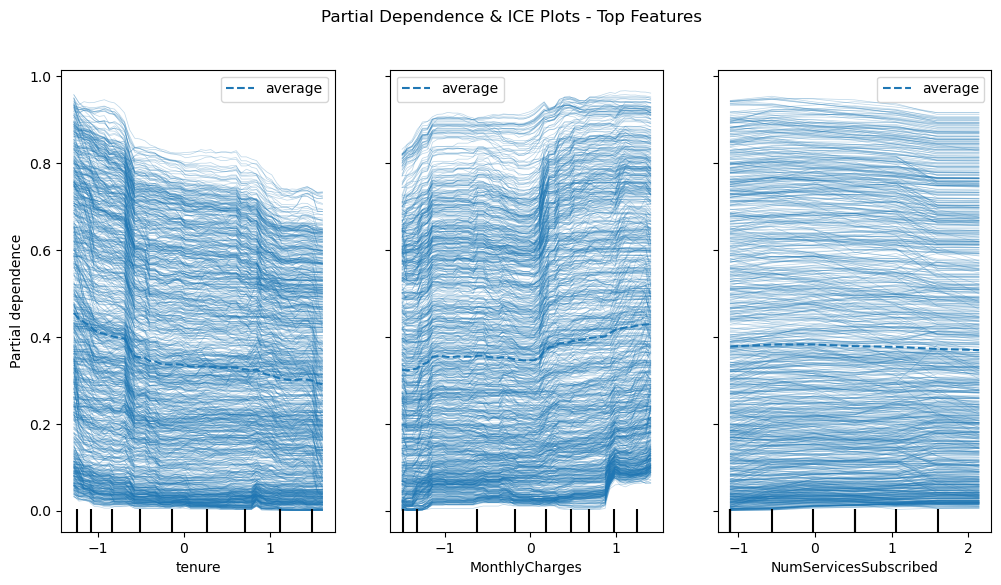

In [110]:

# Top 3 numeric features by importance
top_numeric_features = ['tenure', 'MonthlyCharges', 'NumServicesSubscribed']

# Partial Dependence Plots
fig, ax = plt.subplots(figsize=(12,6))
PartialDependenceDisplay.from_estimator(
    rf_best,
    X_train,
    features=top_numeric_features,
    kind='both',   # shows PDP + ICE
    grid_resolution=50,
    ax=ax
)
plt.suptitle("Partial Dependence & ICE Plots - Top Features")
plt.show()
